# ISOM 352 Applied Data Analytics with Coding
## M3.2 Interact with the web and API

In this class, we will explore webscraping from webpages on the internet:
Specifically, we will complete the following task:
- Interact with the web
- Query data from API 


In [1]:
# Install and import the library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.style.use('ggplot')


## Review: Set up `Selenium` for Webscraping

### Step 0: Install the necessary library

In [2]:
# if you're using Google Colab, Do the following
# !apt install chromium-chromedriver
# !pip install selenium bs4

# # if you're using VS Code Locally, Do the following instead
%pip install selenium 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Step 1: Setup the explorer

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By

def web_driver(headless=False):
    options = webdriver.ChromeOptions()
    options.add_argument("--disable-extensions")
    options.add_argument("--disable-infobars")
    options.add_argument("--incognito") # private mode
    options.add_argument("--no-sandbox")
    options.add_experimental_option("prefs", {"profile.managed_default_content_settings.images": 2}) # Disable images
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36") # Set user agent to mimic 

    # Configure GUI 
    if headless:
        options.add_argument("--headless")  # no GUI

    # define and return a driver (A Chrome page/tab)
    return webdriver.Chrome(options=options)



In [5]:
# Step 1: Initialize driver (A Chrome page/tab)
driver = web_driver(headless=False)

# if you are using colab, please use the following
# driver = web_driver(headless=True)

In [ ]:
# Step 2: Access the webpage using Chrome and get the data on the page


In [ ]:
# Step 3: close the driver
driver.quit()

### Step 2 Scrape data
Using different locators
- id: `driver.find_element(By.ID, 'some-id')`
- name: `driver.find_element(By.NAME, 'some-name')`
- class: `driver.find_element(By.CLASS_NAME, 'some-class')`
- tag: `driver.find_element(By.TAG_NAME, 'some-tag')`
- css selector: `driver.find_element(By.CSS_SELECTOR, 'tag.class > tag[attribute="value"]')`


## Task 1: scraper Yahoo finance

In [6]:
# Get the data
url = "https://finance.yahoo.com/quote/IBM/history/"
driver.get(url)


Our plan: 
- Understand the structure 
- Find all the `<tr>` table rows, then 
- Find table data `<td>`

### 2.1 Find all the `<tr>` table rows, 


In [9]:
# Find all the table rows in the tbody
rows = driver.find_elements(By.CSS_SELECTOR, "tbody > tr")
print(f"Find {len(rows)} on the page")


Find 256 on the page


### 2.2 Find table data `<td>`
Each row is made up of many `<td>`

In [12]:
# Find all the data in the first rows 
tds = rows[0].find_elements(By.CSS_SELECTOR, 'td')

print(f"there are {len(tds)} table data")

for td in tds:
    print(td.text)

there are 7 table data
Apr 3, 2025
242.71
250.61
242.53
244.69
244.69
2,276,662


### 2.3 Collect all the data with list

In [25]:

# Initialize lists to store the data
dates = []
open = []
high = []
low = []
close = []
adj_close = []
volume = []

# Loop through all the rows and get the data from each row
for row in rows:
    data = row.find_elements(By.TAG_NAME, "td")

    # check how many tds are there
    if len(data) < 7:
        continue # skip this row
    
    dates.append(data[0].text)
    open.append(data[1].text)
    high.append(data[2].text)
    low.append(data[3].text)

    close_price = float(data[4].text)
    close.append(close_price)
    adj_close.append(data[5].text)
    volume.append(data[6].text)
    


In [18]:
dates[-1]

'Apr 3, 2024'

### 2.4 Create a DataFrame


<Axes: xlabel='Date'>

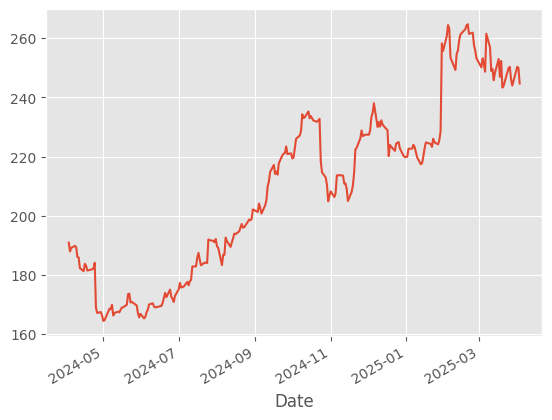

In [30]:
# Create a DataFrame with the collected data
df  = pd.DataFrame(
    {
        'Date': dates,
        'Open': open,
        'High': high,
        'Low': low,
        'Close': close,
    }
)
# cast the Date into datetime
df['Date'] = pd.to_datetime(df['Date'])

# set the Date col as the index
df = df.set_index('Date')


df['Close'].plot()

## Task 2. Interact with the webpage
To interact with a webpage, you typically start by locating web elements using various strategies like ID, name, class name, tag name, or CSS selectors. Once the elements are located, you can perform actions on them using methods provided by Selenium, such as click(), send_keys(), and get_attribute(). 

- Clicking Elements:
    - element.click()
- Entering Text:
    - element.send_keys('some text')
- Scrolling:
    - driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [62]:
# find the time period button
history_button = driver.find_elements(By.CSS_SELECTOR, 'button.tertiary-btn')

print(f"Find {len(history_button)} time period buttons")

# Click the time period button
history_button[0].click()


Find 4 time period buttons


In [63]:
# find the button with vlaue="YTD"
time_period_button = driver.find_element(By.CSS_SELECTOR, 'button[value="YTD"]')

# Click the time period button
time_period_button.click()

## Task 3: Use Yahoo Finance API
Yahoo Finance API provides a more reliable and efficient way to access financial data compared to web scraping. 

Advantages of using Yahoo Finance API:
- Offers structured data access with consistent formatting
- Provides higher rate limits and better stability
- Eliminates the need to handle HTML parsing
- Avoids dealing with website structure changes or anti-scraping measures
- Makes code more maintainable and less prone to breaking when website layout changes
- Provides access to historical data, real-time quotes, company information, and other financial metrics in a standardized format


In [64]:
# Install yfinance if not already installed
%pip install yfinance -q

import yfinance as yf


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [67]:
# Define the ticker symbol
ticker_symbol = "IBM"

# Create a Ticker object for the specified symbol
ticker = yf.Ticker(ticker_symbol)

# Retrieve historical data for the past 1000 days
data = ticker.history(period="100d")

# Display the retrieved historical data
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-07 00:00:00-05:00,210.566622,211.433967,208.881215,210.615906,3675800,0.00,0.0
2024-11-08 00:00:00-05:00,211.079150,213.582604,209.718997,210.645477,3201000,0.00,0.0
2024-11-11 00:00:00-05:00,211.315681,212.311161,210.408918,210.497635,3013000,0.00,0.0
2024-11-12 00:00:00-05:00,210.497619,211.620145,207.676418,209.464508,2817800,1.67,0.0
2024-11-13 00:00:00-05:00,208.113508,210.010871,207.686361,209.524109,3247800,0.00,0.0
...,...,...,...,...,...,...,...
2025-03-28 00:00:00-04:00,246.270004,247.570007,242.070007,244.000000,3125300,0.00,0.0
2025-03-31 00:00:00-04:00,242.740005,250.889999,242.490005,248.660004,6795000,0.00,0.0
2025-04-01 00:00:00-04:00,248.029999,250.619995,243.490005,250.339996,4412900,0.00,0.0


In [73]:
import datetime

# Format dates as strings in YYYY-MM-DD format
start_date = '2024-04-03'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

print(f"Fetching data from {start_date} to {end_date}")

# Download the data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Reset index to make Date a column
data = data.reset_index()

# Display the first few rows of the data
print(f"Retrieved {len(data)} days of data")
data.head()

# Optional: Save to CSV
data.to_csv('ibm_1year_data.csv', index=False)

[*********************100%***********************]  1 of 1 completed

Fetching data from 2024-04-03 to 2025-04-03
Retrieved 251 days of data


<Axes: xlabel='Date'>

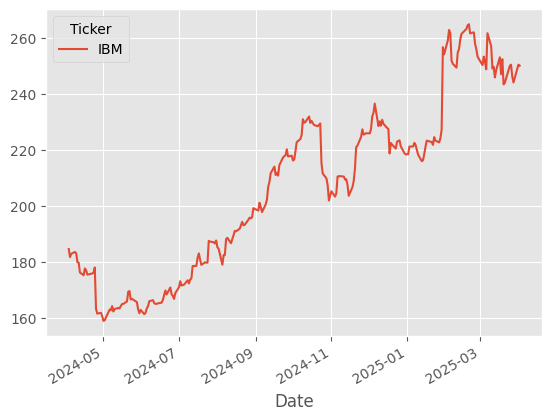

In [74]:
# set the Date as index
data = data.set_index('Date')

# plot the close price
data['Close'].plot()

In [ ]:
# import the libraries
# %pip install scikit-learn

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [ ]:
# Step 0: Load the data and pre-process data 
sales_data = pd.read_csv('RetailSales.csv')

# Explore the data
sales_data.info()
sales_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE           340 non-null    object
 1   MRTSSM4453USN  340 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [ ]:
# Rename the column to 'sales'
sales_data = sales_data.rename(columns={'MRTSSM4453USN': 'sales'})

# Convert to datetime
sales_data['DATE'] = pd.to_datetime(sales_data['DATE'])

# Set datetime as index
sales_data = sales_data.set_index('DATE')
sales_data.index.freq = 'MS'
sales_data.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01'],
              dtype='datetime64[ns]', name='DATE', length=340, freq='MS')

### 2.1: Decompose the data

<Axes: xlabel='DATE'>

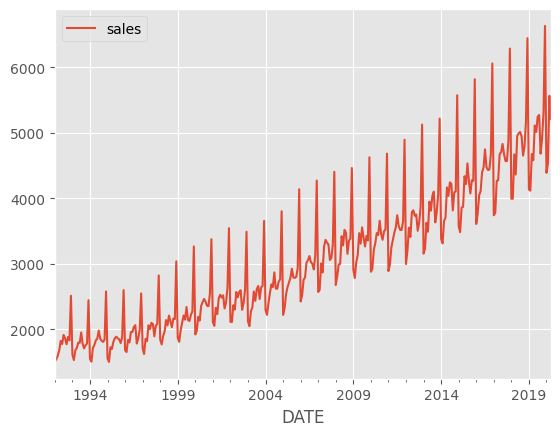

In [ ]:
# Plot the data
sales_data.plot()

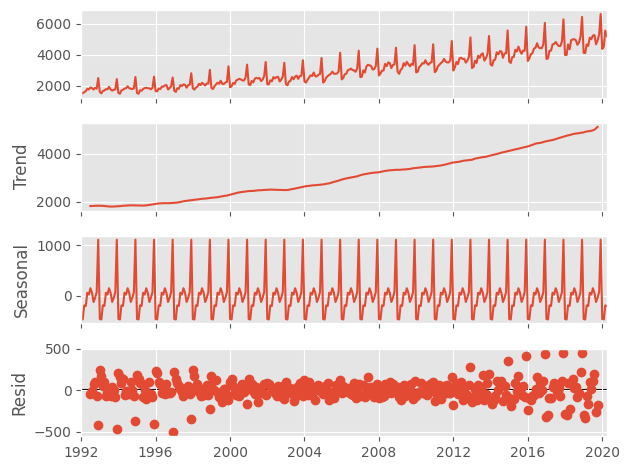

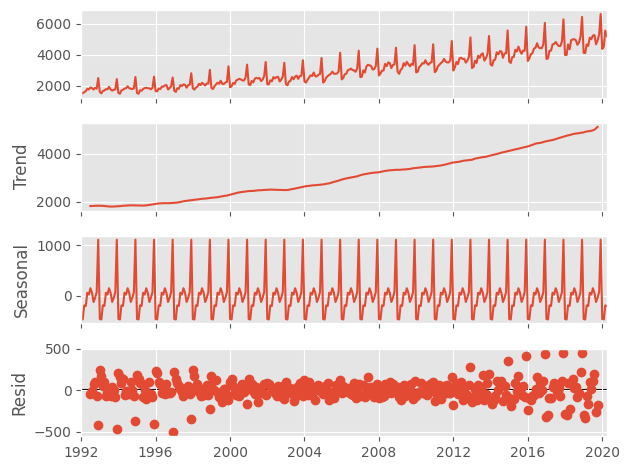

In [ ]:
# decompose the time series data
decomposition = sm.tsa.seasonal_decompose(sales_data, 
                                        period=12, # monthly data
                                        model='additive')
decomposition.plot()


### 2.2: Choose an appropriate model
SARIMA (Seasonal AutoRegressive Integrated Moving Average) Model:
 - AR(p): AutoRegressive component - uses past values to predict future values
 - I(d): Integrated component - differencing to make the time series stationary
 - MA(q): Moving Average component - uses past forecast errors in the model
 - Seasonal component (P,D,Q,s): Captures seasonal patterns in the data
 - Parameters (p,d,q)(P,D,Q,s) must be specified when fitting the model
 - p: order of the autoregressive part
 - d: degree of differencing required for stationarity
 - q: order of the moving average part
 - P: seasonal autoregressive order
 - D: seasonal differencing order
 - Q: seasonal moving average order
 - s: length of the seasonal cycle

In [ ]:
# For simplicity and as an example, we will choose a basic set of parameters.

# Create the model and fit data
sales_sarima = SARIMAX(
    sales_data, 
    order=(2, 1, 1), 
    seasonal_order=(1, 1, 1, 12)
    ).fit()


# Show the model summary 
print(sales_sarima.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                  340
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1932.354
Date:                            Thu, 03 Apr 2025   AIC                           3876.708
Time:                                    12:41:28   BIC                           3899.448
Sample:                                01-01-1992   HQIC                          3885.781
                                     - 04-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9099      0.111     -8.184      0.000      -1.128      -0.692
ar.L2         -0.5072      0.067   

### 3.3: Make Predictions
Prediction is a generally term that can apply to within or out of data range

RMSE: 154.71


<Figure size 1200x600 with 0 Axes>

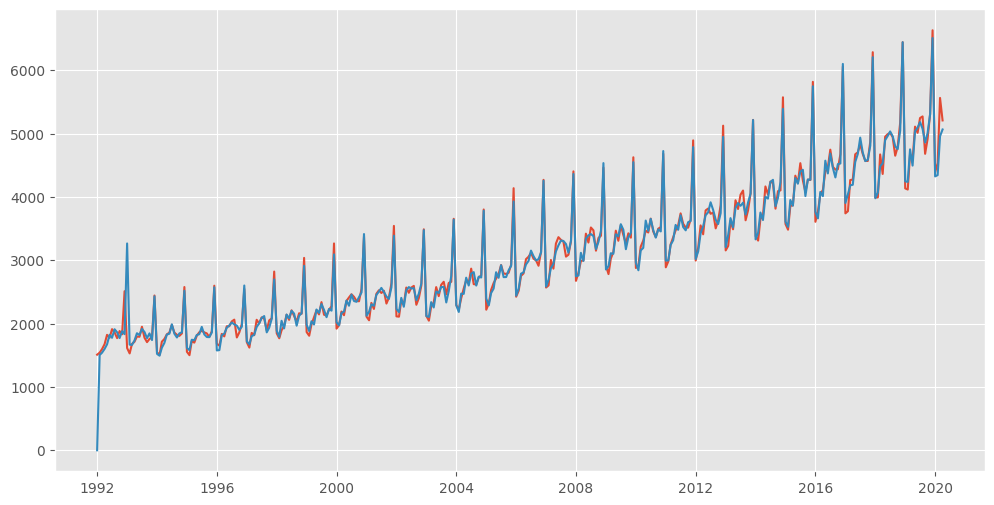

In [ ]:
# Get prediction and plot the data
fitted_values = sales_sarima.get_prediction()
sales_pred = fitted_values.predicted_mean

# Evaluate the accuracy
mse = mean_squared_error(sales_data, sales_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

# Visualize the prediction
plt.figure(figsize=(12,6))

plt.figure(figsize=(12,6))
plt.plot(sales_data, label='Actual Sales')
plt.plot(sales_pred, label='Predicted Sales')

# # Get the confidence interval
# conf_lower = fitted_values.conf_int()['lower sales']
# conf_upper = fitted_values.conf_int()['upper sales']
# plt.fill_between(x=sales_pred.index,
#                  y1=conf_lower,
#                  y2=conf_upper,
#                  color='gray')
# plt.legend()
# plt.show()



### Step 4: Make Forecasts
Forecast tyically refers to beyond current time horizon 

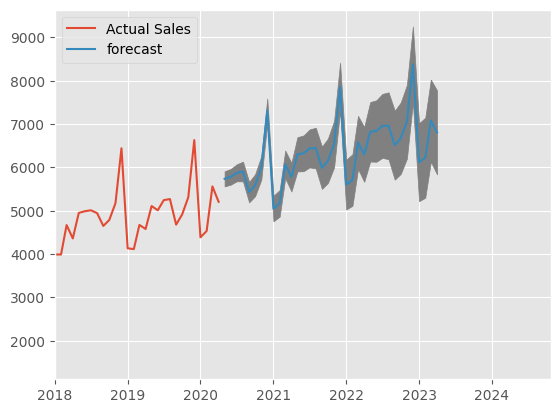

In [ ]:
plt.plot(sales_data, label='Actual Sales')

# Make forecast and plot the confidence interval
forecast_results = sales_sarima.get_forecast(steps=36)
forecast = forecast_results.predicted_mean
plt.plot(forecast, label='forecast')

# Confidence interval
conf_lower = forecast_results.conf_int()['lower sales']
conf_upper = forecast_results.conf_int()['upper sales']
plt.fill_between(x=forecast.index,
                 y1=conf_lower,
                 y2=conf_upper,
                 color='gray')
plt.legend()
plt.xlim(left=pd.to_datetime('2018-01-01'))
plt.show()